steps:
1. load sentinel data


In [1]:
from greensight.utils import DIR_DATA
import geopandas as gpd
import pandas as pd
import json

In [2]:
sentinel_data_path = DIR_DATA / "sentinel_data"
assert sentinel_data_path.is_dir()

In [3]:
for year_path in list(sentinel_data_path.iterdir())[:]:
    # load and concatenate all mean reading files
    print(year_path)
    df_year = pd.concat([gpd.read_file(file) for file in year_path.iterdir() if "mean" in file.stem], axis=0)
    break

/home/finley/Work/RDS/green_sight/data/sentinel_data/Greenbelts_2016


In [4]:
df_year = df_year.set_index("LAD_CD")
df_year.head(3)

,system:index,0_VHAsc,0_VHDes,0_VVAsc,0_VVDes,10_VHAsc,10_VHDes,10_VVAsc,10_VVDes,11_VHAsc,...,7_VVDes,8_VHAsc,8_VHDes,8_VVAsc,8_VVDes,9_VHAsc,9_VHDes,9_VVAsc,9_VVDes,.geo
LAD_CD,,,,,,,,,,,,,,,,,,,,,
"(E06000022, E07000197, E07000083, E07000069, E09000017, E07000243, E06000049, E08000008, E07000165, E07000164)",1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,-16.96580159503805,-16.730481346687366,-10.689856037312476,-10.475673352131425,-18.03511669239564,-19.962146880226307,-11.63205167946151,-14.132218400716058,-17.7504215965922,...,-11.310900065324033,-19.454138558406466,-19.0758509477531,-11.934437505402013,-11.578571936983307,-18.98807274592778,-18.269831648449387,-10.830155820077968,-10.359975218496245,"{""type"":""Polygon"",""coordinates"":[[[-1.20237871..."
"(E06000023, E07000221, E07000032, E06000056, E09000018, E07000214, E06000050, E08000009, E08000034, E07000165)",1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,-15.888147627399299,-15.777050812643939,-10.160175109686907,-9.851052600908018,-16.85760238445593,-21.653797873801285,-11.02030607825796,-16.211530750222177,-16.479273847052724,...,-11.71364228269909,-19.32215406377874,-19.649707929719376,-12.400146581250548,-12.276348346486062,-19.064001614409886,-18.52006310261335,-11.671588844570149,-11.177824170672007,"{""type"":""GeometryCollection"",""geometries"":[{""t..."
"(E07000187, E07000199, E07000170, E07000070, E09000021, E09000029, E07000118, E06000007, E08000035, E07000167)",1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,-16.72918711168973,-16.291416960351444,-10.31199687364995,-9.983565077102046,-17.903594454264624,-26.643339582767933,-11.084376210001196,-21.548161963234804,-17.500971257394916,...,-11.72601719972782,-35.05890263535312,-19.6896638463127,-31.03088367257397,-12.34079904236018,-26.456481273663865,-18.821801843916585,-20.095301622042594,-11.29284118416286,"{""type"":""Polygon"",""coordinates"":[[[-0.99581983..."


In [5]:
# remove non-useful columns
df_year = df_year.drop(columns=["system:index", ".geo"])

In [6]:
print(int(df_year["0_VHDes"].isna().sum()))
print(int(df_year["0_VVDes"].isna().sum()))

TypeError: cannot convert the series to <class 'int'>

In [7]:
df_year = df_year.drop(columns=["0_VVDes", "0_VHDes"])
df_year.head(3)

,0_VHAsc,0_VVAsc,10_VHAsc,10_VHDes,10_VVAsc,10_VVDes,11_VHAsc,11_VHDes,11_VVAsc,11_VVDes,...,7_VVAsc,7_VVDes,8_VHAsc,8_VHDes,8_VVAsc,8_VVDes,9_VHAsc,9_VHDes,9_VVAsc,9_VVDes
LAD_CD,,,,,,,,,,,,,,,,,,,,,
"(E06000022, E07000197, E07000083, E07000069, E09000017, E07000243, E06000049, E08000008, E07000165, E07000164)",-16.96580159503805,-10.689856037312476,-18.03511669239564,-19.962146880226307,-11.63205167946151,-14.132218400716058,-17.7504215965922,-20.73559037742271,-11.478829500956786,-15.174158171186072,...,-11.495377563440613,-11.310900065324033,-19.454138558406466,-19.0758509477531,-11.934437505402013,-11.578571936983307,-18.98807274592778,-18.269831648449387,-10.830155820077968,-10.359975218496245
"(E06000023, E07000221, E07000032, E06000056, E09000018, E07000214, E06000050, E08000009, E08000034, E07000165)",-15.888147627399299,-10.160175109686907,-16.85760238445593,-21.653797873801285,-11.02030607825796,-16.211530750222177,-16.479273847052724,-22.238153211570495,-10.716069590693051,-17.30219082265485,...,-11.922931310091656,-11.71364228269909,-19.32215406377874,-19.649707929719376,-12.400146581250548,-12.276348346486062,-19.064001614409886,-18.52006310261335,-11.671588844570149,-11.177824170672007
"(E07000187, E07000199, E07000170, E07000070, E09000021, E09000029, E07000118, E06000007, E08000035, E07000167)",-16.72918711168973,-10.31199687364995,-17.903594454264624,-26.643339582767933,-11.084376210001196,-21.548161963234804,-17.500971257394916,-28.05095822183714,-10.8951364144867,-23.19659271044651,...,-19.156758571519735,-11.72601719972782,-35.05890263535312,-19.6896638463127,-31.03088367257397,-12.34079904236018,-26.456481273663865,-18.821801843916585,-20.095301622042594,-11.29284118416286


In [8]:
# load lookup table
lookup_path = DIR_DATA / "id_lookup/id_lookup.json"

with open(lookup_path, "r") as in_file:
    D_lookup = json.load(in_file)

In [9]:
# Add in the greenbelt information via lookup
df_year["greenbelt"] = df_year.index.map(D_lookup.get)
df_year.insert(0, "greenbelt", df_year.pop("greenbelt"))    # bring to front
df_year.head(3)

/tmp/ipykernel_104308/550526447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_year["greenbelt"] = df_year.index.map(D_lookup.get)
/tmp/ipykernel_104308/550526447.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_year.insert(0, "greenbelt", df_year.pop("greenbelt"))    # bring to front


,greenbelt,0_VHAsc,0_VVAsc,10_VHAsc,10_VHDes,10_VVAsc,10_VVDes,11_VHAsc,11_VHDes,11_VVAsc,...,7_VVAsc,7_VVDes,8_VHAsc,8_VHDes,8_VVAsc,8_VVDes,9_VHAsc,9_VHDes,9_VVAsc,9_VVDes
LAD_CD,,,,,,,,,,,,,,,,,,,,,
"(E06000022, E07000197, E07000083, E07000069, E09000017, E07000243, E06000049, E08000008, E07000165, E07000164)",None,-16.96580159503805,-10.689856037312476,-18.03511669239564,-19.962146880226307,-11.63205167946151,-14.132218400716058,-17.7504215965922,-20.73559037742271,-11.478829500956786,...,-11.495377563440613,-11.310900065324033,-19.454138558406466,-19.0758509477531,-11.934437505402013,-11.578571936983307,-18.98807274592778,-18.269831648449387,-10.830155820077968,-10.359975218496245
"(E06000023, E07000221, E07000032, E06000056, E09000018, E07000214, E06000050, E08000009, E08000034, E07000165)",None,-15.888147627399299,-10.160175109686907,-16.85760238445593,-21.653797873801285,-11.02030607825796,-16.211530750222177,-16.479273847052724,-22.238153211570495,-10.716069590693051,...,-11.922931310091656,-11.71364228269909,-19.32215406377874,-19.649707929719376,-12.400146581250548,-12.276348346486062,-19.064001614409886,-18.52006310261335,-11.671588844570149,-11.177824170672007
"(E07000187, E07000199, E07000170, E07000070, E09000021, E09000029, E07000118, E06000007, E08000035, E07000167)",None,-16.72918711168973,-10.31199687364995,-17.903594454264624,-26.643339582767933,-11.084376210001196,-21.548161963234804,-17.500971257394916,-28.05095822183714,-10.8951364144867,...,-19.156758571519735,-11.72601719972782,-35.05890263535312,-19.6896638463127,-31.03088367257397,-12.34079904236018,-26.456481273663865,-18.821801843916585,-20.095301622042594,-11.29284118416286


In [10]:
# Add year information
year = year_path.stem.split("_")[1]
df_year.insert(0, "year", [year]*df_year.shape[0])

/tmp/ipykernel_104308/1559104198.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_year.insert(0, "year", [year]*df_year.shape[0])


In [11]:
df_year.columns[df_year.isna().any()]

Index(['greenbelt', '0_VHAsc', '0_VVAsc', '10_VHAsc', '10_VHDes', '10_VVAsc',
       '10_VVDes', '11_VHAsc', '11_VHDes', '11_VVAsc', '11_VVDes', '1_VHAsc',
       '1_VHDes', '1_VVAsc', '1_VVDes', '2_VHAsc', '2_VHDes', '2_VVAsc',
       '2_VVDes', '3_VHAsc', '3_VHDes', '3_VVAsc', '3_VVDes', '4_VHAsc',
       '4_VHDes', '4_VVAsc', '4_VVDes', '5_VHAsc', '5_VHDes', '5_VVAsc',
       '5_VVDes', '6_VHAsc', '6_VHDes', '6_VVAsc', '6_VVDes', '7_VHAsc',
       '7_VHDes', '7_VVAsc', '7_VVDes', '8_VHAsc', '8_VHDes', '8_VVAsc',
       '8_VVDes', '9_VHAsc', '9_VHDes', '9_VVAsc', '9_VVDes'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt

In [13]:
df_year

,year,greenbelt,0_VHAsc,0_VVAsc,10_VHAsc,10_VHDes,10_VVAsc,10_VVDes,11_VHAsc,11_VHDes,...,7_VVAsc,7_VVDes,8_VHAsc,8_VHDes,8_VVAsc,8_VVDes,9_VHAsc,9_VHDes,9_VVAsc,9_VVDes
LAD_CD,,,,,,,,,,,,,,,,,,,,,
"(E06000022, E07000197, E07000083, E07000069, E09000017, E07000243, E06000049, E08000008, E07000165, E07000164)",2016,None,-16.96580159503805,-10.689856037312476,-18.03511669239564,-19.962146880226307,-11.63205167946151,-14.132218400716058,-17.7504215965922,-20.73559037742271,...,-11.495377563440613,-11.310900065324033,-19.454138558406466,-19.0758509477531,-11.934437505402013,-11.578571936983307,-18.98807274592778,-18.269831648449387,-10.830155820077968,-10.359975218496245
"(E06000023, E07000221, E07000032, E06000056, E09000018, E07000214, E06000050, E08000009, E08000034, E07000165)",2016,None,-15.888147627399299,-10.160175109686907,-16.85760238445593,-21.653797873801285,-11.02030607825796,-16.211530750222177,-16.479273847052724,-22.238153211570495,...,-11.922931310091656,-11.71364228269909,-19.32215406377874,-19.649707929719376,-12.400146581250548,-12.276348346486062,-19.064001614409886,-18.52006310261335,-11.671588844570149,-11.177824170672007
"(E07000187, E07000199, E07000170, E07000070, E09000021, E09000029, E07000118, E06000007, E08000035, E07000167)",2016,None,-16.72918711168973,-10.31199687364995,-17.903594454264624,-26.643339582767933,-11.084376210001196,-21.548161963234804,-17.500971257394916,-28.05095822183714,...,-19.156758571519735,-11.72601719972782,-35.05890263535312,-19.6896638463127,-31.03088367257397,-12.34079904236018,-26.456481273663865,-18.821801843916585,-20.095301622042594,-11.29284118416286
"(E06000024, E08000030, E07000172, E09000008, E06000032, E07000215, E06000006, E07000127, E07000038, E07000169)",2016,None,-16.328040345165103,-10.228331927102595,-17.512546933539227,-23.302642750843507,-11.417558934701878,-18.303138072328736,-17.085041230912893,-24.092357400638814,...,-11.47352437505044,-11.605810558878053,-19.51248348733794,-19.45641084720519,-12.02855260972342,-12.081965856471422,-19.306045776650503,-18.611637548018457,-11.151734027697747,-10.824034598384829
"(E06000025, E07000222, E06000015, E07000096, E07000110, E07000102, E07000037, E08000010, E08000018, E06000014)",2016,None,-16.75873931269601,-10.488981958003803,-18.136706776229662,-21.7746746436063,-11.69596981108345,-16.176629262826896,-17.59052903469873,-22.478282506932363,...,-15.374519400479128,-11.98576761075926,-25.3515448017431,-19.369823047877503,-20.65085260755694,-12.42212299004177,-21.819155878476934,-18.638576393190693,-15.832447744844343,-11.392323507559784
"(E06000054, E08000031, E07000036, E07000107, E06000035, E06000034, E07000120, E08000015, E07000169, nan)",2016,None,-16.800766953614477,-10.382541997778263,-17.81722615612005,-22.617194149102207,-11.143350793715951,-16.95278681564331,-17.399913271296576,-23.503978195325057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(E08000025, E07000237, E07000173, E09000009, E07000228, E07000115, E08000011, E07000177, E08000019, nan)",2016,None,-16.130046322517,-10.03633076505251,-17.350762886216174,-17.610880461933615,-11.01661351268412,-11.398846995116207,-16.63158830509817,-17.726875391657817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(E07000234, E07000238, E07000175, E07000242, E07000210, E07000116, E08000012, E07000178, E08000036, nan)",2016,None,-16.051267835757837,-9.812689715353123,-17.578244050726884,-20.479052584416323,-11.141668506205761,-14.645092179823953,-17.0123745882397,-21.172654413051088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(E07000192, E07000239, E06000018, E07000207, E09000025, E07000077, E08000003, E07000179, E06000049, nan)",2016,None,-15.372813578855263,-9.860344315174746,-16.565443918057074,-25.805004747340583,-10.725369452018686,-21.47624152325267,-15.938902321278412,-27.39116234056194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
import numpy as np
print(len(df_year.index))
print(len(np.unique(df_year.index)))

20
20


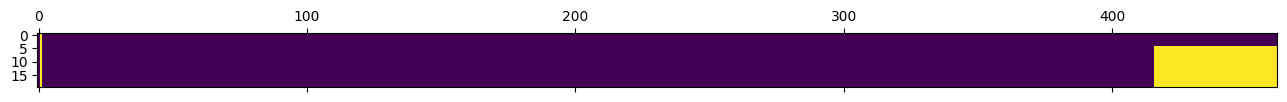

In [15]:
plt.matshow(df_year.isna())

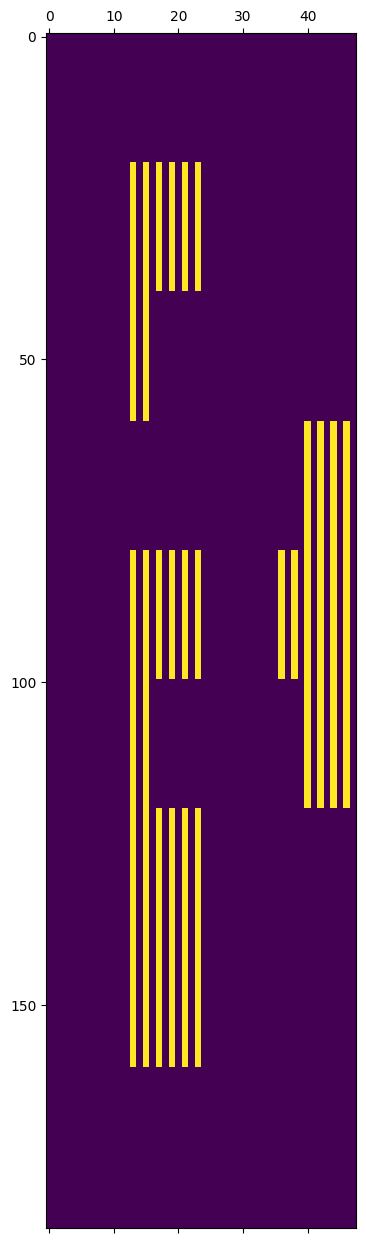

In [33]:
plt.matshow(df_year.isna())

In [32]:
import matplotlib.pyplot as plt